In [193]:
# Assigment 4
# 

# Initialisation of libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [194]:
def mean_smooth(arr):
    dub = np.array(arr)
    for i in range(6, len(dub) - 6):
        k = i
        dub[i] = 1 / 24 * dub[i-6] + 1 / 12 * (dub[i-5] + dub[i-4] + dub[i-3] + dub[i-2] + dub[i-1] + dub[i] + dub[i+1] + dub[i+2] + dub[i+3] + dub[i+4] + dub[i+5]) + 1 / 24 * dub[i+6]
    return dub

In [195]:
def exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(1, len(arr)):
        dub[i] = dub[i - 1] + alp * (dub[i] - dub[i - 1])
    return dub

In [196]:
def backward_exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(len(arr) - 1):
        dub[i] = dub[i + 1] + alp * (dub[i] - dub[i + 1])
    return dub

In [197]:
def deviation_indicator(arrz, arrx):
    return sum(np.square(arrz - arrx))

In [198]:
def variability_indicator(arr):
    summ = 0
    for i in range(len(arr) - 2):
        summ = summ + (arr[i + 2] - 2 * arr[i + 1] + arr[i]) ** 2
    return summ

In [199]:
f = open('/Users/vladimirberman/Downloads/data_group6.txt', 'r')
lines = f.readlines()

In [200]:
print(pd.to_datetime('102022', format='%m%Y'))

2022-10-01 00:00:00


In [201]:
data_from_file = [i.replace('\n', '') for i in lines]

In [202]:
data_row = zip([pd.to_datetime(i.split()[0] + i.split()[1], format = '%Y%m') for i in data_from_file], [i.split()[2] for i in data_from_file])

In [203]:
data_row = dict(map(lambda i,j : (i,j) , [pd.to_datetime(i.split()[0] + i.split()[1], format = '%Y%m') for i in data_from_file],[i.split()[2] for i in data_from_file]))

In [204]:
df = pd.DataFrame({'Values' : [i.split()[2] for i in data_from_file]}, index=[pd.to_datetime(i.split()[0] + i.split()[1], format = '%Y%m') for i in data_from_file])

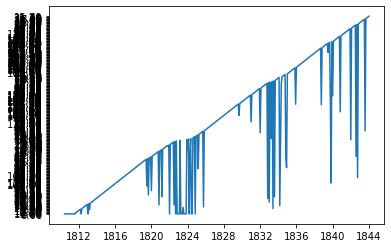

In [205]:
plt.plot(df.index, df.Values)

In [206]:
# data_from_file = [i.replace('\n', '') for i in lines]
result = []
data = np.zeros([len(lines), 3])
for i in range(len(lines)):
    lines[i] = lines[i].replace('\n', '')
    result.append(lines[i].split())
for i in range(len(result)):
    for j in range(3):
        data[i][j] = float(result[i][j])
        

In [207]:
v = np.zeros(len(data))
ro = np.zeros(len(data))

for i in range(1,len(data)):
    v[i] = data[i , 0] - data[i - 1, 0]
for i in range(2,len(data)):
    ro[i] = data[i, 0] - data[i - 2, 0]

In [208]:
Ev = np.std(v[1:len(v) - 1]) ** 2
Ero = np.std(ro[2:len(ro) - 1]) ** 2
E = np.array([Ev, Ero])

In [209]:
coefs = (np.array([[1, 2], [2, 2]]))
sigma_2 = np.dot(np.linalg.inv(coefs), E)

In [210]:
hi = sigma_2[1] / sigma_2[0]
alp = (-hi + np.sqrt(hi ** 2 + 4 * hi)) / 2
M = 13

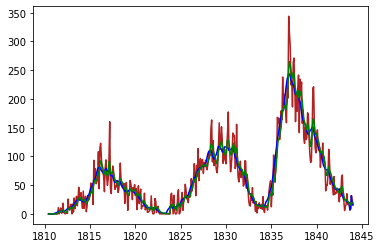

In [211]:
plt.plot(data[:,0] + (data[:,1] - 1) / 12, data[:,2], color = 'firebrick')
plt.plot(data[:,0] + (data[:,1] - 1) / 12, mean_smooth(data[:,2]), color = 'b')
plt.plot(data[:,0] + (data[:,1] - 1) / 12, backward_exp_smooth(alp, exp_smooth(alp, data[:,2])), color = 'g')

In [212]:
print(deviation_indicator(data[:,2], backward_exp_smooth(alp, exp_smooth(alp, data[:,2]))))
print(deviation_indicator(data[:,2], mean_smooth(data[:,2])))

131645.1007151798
172989.68836064258


In [213]:
print(variability_indicator(backward_exp_smooth(alp, exp_smooth(alp, data[:,2]))))
print(variability_indicator(mean_smooth(data[:,2])))

13838.805750836096
4447.648588932496


In [219]:
#Part 2
f = open('/Users/vladimirberman/Downloads/noisy_surface.txt', 'r')
lines = f.readlines()
result = []

In [224]:
true_surf = np.zeros([len(lines), len(lines)])
for i in range(len(lines)):
    lines[i] = lines[i].replace('\n', '')
    result.append(lines[i].split())
for i in range(len(lines)):
    for j in range(len(lines)):
        true_surf[i][j] = float(result[i][j])


In [246]:
true_surf_row = np.array(true_surf).reshape(1, 2601)[0]

In [310]:
x = np.arange(51)

In [311]:
for i in range(50):
    x = np.append(x, np.arange(51), axis = None)

In [317]:
y = np.zeros(2601)
for i in range(2601):
    y[i] = i // 51

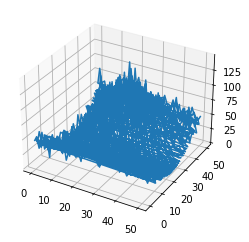

In [320]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(x, y, true_surf_row, label = 'parametric curve')

0